In [87]:
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["PINECODE_API_KEY"]=os.getenv("PINECODE_API_KEY")
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")
os.environ["HUGGINGFACE_API_KEY"]=os.getenv("HUGGINGFACE_API_KEY")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"]=os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACING_V2"]=os.getenv("LANGCHAIN_TRACING_V2")

In [88]:
model="deepseek-r1-distill-llama-70b"
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate

In [89]:
llm=ChatGroq(model_name=model)

In [90]:
print(llm.invoke("Hi").content)

<think>

</think>

Hello! How can I assist you today? 😊


In [91]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph.message import add_messages
from langgraph.graph import MessagesState, StateGraph, END, START
from langchain_core.tools import tool

In [92]:
def call_model(state:MessagesState):
    message=state["messages"]
    response=llm.invoke(message)
    return {"messages":[response]}
    

In [93]:
state={"messages":["hi","How are you"]}
call_model(state)

{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How can I assist you today? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 8, 'total_tokens': 52, 'completion_time': 0.163019606, 'prompt_time': 0.000135838, 'queue_time': 0.054398936, 'total_time': 0.163155444}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--b26f64d4-8993-4e46-8cae-1afb56cd5237-0', usage_metadata={'input_tokens': 8, 'output_tokens': 44, 'total_tokens': 52})]}

In [94]:
workflow = StateGraph(MessagesState)

In [95]:
workflow.add_edge(START,"chat_bot")
workflow.add_node("chat_bot",call_model)
workflow.add_edge("chat_bot",END)

app=workflow.compile()

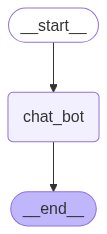

In [96]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [97]:
app.invoke({"messages":["hi","How are you ?"]})

{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='de18f66d-8b2b-492f-b127-44b6f21e7eba'),
  HumanMessage(content='How are you ?', additional_kwargs={}, response_metadata={}, id='9361069f-4aac-4333-869b-47ab07807281'),
  AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How can I assist you today? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 9, 'total_tokens': 53, 'completion_time': 0.188554405, 'prompt_time': 0.000765997, 'queue_time': 0.061438794000000005, 'total_time': 0.189320402}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--7f9142e1-434f-4df9-acb6-2abd1c7dcf95-0', usage_metadata={'input_tokens': 9, 'output_tokens': 44, 'total_tokens': 53})]}

In [98]:
for output in app.stream({"messages":["hi","How are you ?"]}):
    for key,value in output.items():
        print(f"Output from {key} node")
        print("--------")
        print(value)
        print("--------")

Output from chat_bot node
--------
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How can I assist you today? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 9, 'total_tokens': 53, 'completion_time': 0.190339405, 'prompt_time': 0.000185087, 'queue_time': 0.052185093, 'total_time': 0.190524492}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--3dd48979-58d1-4c83-8c66-fd1a48e60960-0', usage_metadata={'input_tokens': 9, 'output_tokens': 44, 'total_tokens': 53})]}
--------


In [99]:
from langchain_core.tools import tool
@tool
def search(query:str):
    """This is custom tools for weather information"""
    if 'delhi'in query:
        return "temp is 46 degree, very hot"
    else:
        return "temp is 26 degree, very pleasant"

In [119]:
search.invoke("delhi")

'temp is 46 degree, very hot'

In [121]:
tools=[search]
llm_with_tool=llm.bind_tools(tools)

ValueError: Invalid input type <class 'dict'>. Must be a PromptValue, str, or list of BaseMessages.

In [110]:
def call_llm_with_tool(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [127]:
response=call_llm_with_tool({"messages":["hi"]})
response

{'messages': [AIMessage(content="Hello! How can I assist you today? If you're looking for weather information, feel free to ask!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 98, 'prompt_tokens': 124, 'total_tokens': 222, 'completion_time': 0.495078089, 'prompt_time': 0.008021781, 'queue_time': 0.053930093, 'total_time': 0.50309987}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--84ea6716-5400-4fe6-8963-a5bc39ec7f6e-0', usage_metadata={'input_tokens': 124, 'output_tokens': 98, 'total_tokens': 222})]}

In [112]:
from langgraph.prebuilt import ToolNode
tool_node=ToolNode(tools)

In [128]:
def tool_router(state:MessagesState):
    last_message=state["messages"][-1]
    if last_message.tool_calls:
        return "tools"
    else:
        return END

In [138]:
workflow_with_tools=StateGraph(MessagesState)

workflow_with_tools.add_node("llm_with_tool",call_llm_with_tool)

workflow_with_tools.add_node("custom_tools",tool_node)

workflow_with_tools.set_entry_point("llm_with_tool")

workflow_with_tools.add_conditional_edges("llm_with_tool",
                                         tool_router,
                                         {
                                             "tools" : "custom_tools",
                                             END: END
                                         })

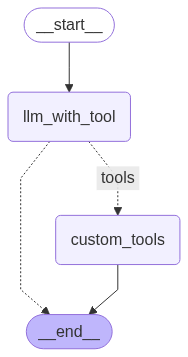

In [144]:
app_with_tools=workflow_with_tools.compile()
from IPython.display import Image, display
display(Image(app_with_tools.get_graph().draw_mermaid_png()))

In [141]:
app_with_tools.invoke({"messages":["hello"]})

{'messages': [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='baa049c2-5004-4301-8ab5-59243b1d390e'),
  AIMessage(content="Hello! How can I assist you today? If you're looking for weather information, please let me know the city you're interested in.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 108, 'prompt_tokens': 124, 'total_tokens': 232, 'completion_time': 0.49808899, 'prompt_time': 0.007985403, 'queue_time': 0.06040587, 'total_time': 0.506074393}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--577faf15-2431-47af-b850-577fbc3c61df-0', usage_metadata={'input_tokens': 124, 'output_tokens': 108, 'total_tokens': 232})]}

In [142]:
for output in app_with_tools.stream({"messages": ["what is the weather in New Delhi?"]}):
    if isinstance(output, dict):
        for key, value in output.items():
            print(f"Here is output from '{key}'")
            print("_______")
            print(value)
            print("\n")
    else:
        print("Unexpected output format:")
        print(output)

Here is output from 'llm_with_tool'
_______
{'messages': [AIMessage(content="To find the current weather in New Delhi, you can use reliable weather websites, apps, or check the weather section on news channels. Some popular options include:\n- **Weather Websites**: AccuWeather, Weather.com, or the Indian Meteorological Department's official website.\n- **Mobile Apps**: The Weather Channel, Weather Underground, or local apps like Mausam for India-specific weather updates.\n- **News Channels**: Many news websites and channels have a weather section that provides up-to-date information.\n\nThese sources will give you the most accurate and recent weather information for New Delhi.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 203, 'prompt_tokens': 131, 'total_tokens': 334, 'completion_time': 0.835053389, 'prompt_time': 0.008443644, 'queue_time': 0.05293552, 'total_time': 0.843497033}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp

In [143]:
workflow_with_loop=StateGraph(MessagesState)

workflow_with_loop.add_node("llm_with_tool",call_llm_with_tool)

workflow_with_loop.add_node("custom_tools",tool_node)

workflow_with_loop.set_entry_point("llm_with_tool")

workflow_with_loop.add_conditional_edges("llm_with_tool",
                                         tool_router,
                                         {
                                             "tools" : "custom_tools",
                                             END: END
                                         })

workflow_with_loop.add_edge("custom_tools","llm_with_tool")

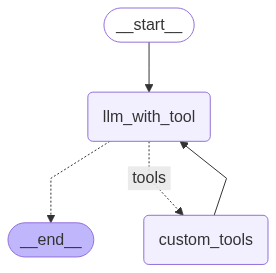

In [145]:
app_with_loop=workflow_with_loop.compile()
from IPython.display import Image, display
display(Image(app_with_loop.get_graph().draw_mermaid_png()))

In [146]:
for output in app_with_loop.stream({"messages":["what is a weather in new delhi?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm_with_tool
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '4wrqag8qp', 'function': {'arguments': '{"query":"New Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 132, 'total_tokens': 281, 'completion_time': 0.730634145, 'prompt_time': 0.0084593, 'queue_time': 0.070902702, 'total_time': 0.739093445}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--236d871b-b243-4db6-aa8d-6831dcfa6193-0', tool_calls=[{'name': 'search', 'args': {'query': 'New Delhi'}, 'id': '4wrqag8qp', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 149, 'total_tokens': 281})]}


here is output from custom_tools
_______
{'messages': [ToolMessage(content='temp is 26 degree, very pleasant', name='search', id='81fc1207-587d-4e89-97c3-3381394ddf7a', tool_call_id=

In [150]:
workflow_with_memory=StateGraph(MessagesState)

workflow_with_memory.add_node("llm_with_tool",call_llm_with_tool)

workflow_with_memory.add_node("custom_tools",tool_node)

workflow_with_memory.set_entry_point("llm_with_tool")

workflow_with_memory.add_conditional_edges("llm_with_tool",
                                         tool_router,
                                         {
                                             "tools" : "custom_tools",
                                             END: END
                                         })

workflow_with_memory.add_edge("custom_tools","llm_with_tool")

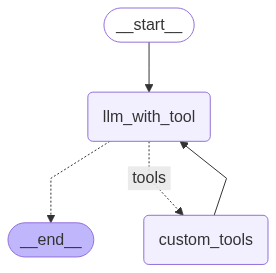

In [151]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
app_with_memory=workflow_with_memory.compile(checkpointer=memory)
from IPython.display import Image, display
display(Image(app_with_memory.get_graph().draw_mermaid_png()))

In [152]:
config={"configurable": {"thread_id": "1"}}

In [154]:
events=app_with_memory.stream(
    {"messages":["what is a weather in new delhi?"]},config=config,stream_mode="values"
    )

In [155]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather in new delhi?
================================== Ai Message ==================================
Tool Calls:
  search (43wm61sj3)
 Call ID: 43wm61sj3
  Args:
    query: weather in New Delhi
================================= Tool Message =================================
Name: search

temp is 26 degree, very pleasant
================================== Ai Message ==================================

The weather in New Delhi is currently 26 degrees, which is very pleasant.


In [156]:
events=app_with_memory.stream(
    {"messages":["what is a weather in indore?"]},config=config,stream_mode="values"
    )

for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather in indore?
================================== Ai Message ==================================
Tool Calls:
  search (awm4xjdt1)
 Call ID: awm4xjdt1
  Args:
    query: weather in Indore
================================= Tool Message =================================
Name: search

temp is 26 degree, very pleasant
================================== Ai Message ==================================

The weather in Indore is currently 26 degrees, which is very pleasant.


In [157]:
config

{'configurable': {'thread_id': '1'}}

In [158]:
memory.get(config)

{'v': 3,
 'ts': '2025-06-14T06:48:21.094243+00:00',
 'id': '1f048eb8-f864-6a56-8008-0d4f37e6ad81',
 'channel_versions': {'__start__': '00000000000000000000000000000007.0.9206518422258172',
  'messages': '00000000000000000000000000000010.0.3989013584129404',
  'branch:to:llm_with_tool': '00000000000000000000000000000010.0.850630281271469',
  'branch:to:custom_tools': '00000000000000000000000000000009.0.5169630961665679'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000006.0.5037280556537125'},
  'llm_with_tool': {'branch:to:llm_with_tool': '00000000000000000000000000000009.0.9547514381092265'},
  'custom_tools': {'branch:to:custom_tools': '00000000000000000000000000000008.0.20966831842602984'}},
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='cecc4778-d6d5-45b1-9258-882076721fbe'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '43wm

In [159]:
events=app_with_memory.stream(
    {"messages":["in which city the temp was 26 degree?"]},config=config,stream_mode="values"
    )

for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

in which city the temp was 26 degree?
================================== Ai Message ==================================

The temperature was 26 degrees in both New Delhi and Indore.


In [160]:
memory.get(config)

{'v': 3,
 'ts': '2025-06-14T06:49:28.803956+00:00',
 'id': '1f048ebb-7e1f-69e6-800b-53de34146811',
 'channel_versions': {'__start__': '00000000000000000000000000000012.0.22615425826124025',
  'messages': '00000000000000000000000000000013.0.03669855230275243',
  'branch:to:llm_with_tool': '00000000000000000000000000000013.0.5294320626416896',
  'branch:to:custom_tools': '00000000000000000000000000000009.0.5169630961665679'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000011.0.5893321384433927'},
  'llm_with_tool': {'branch:to:llm_with_tool': '00000000000000000000000000000012.0.4392752977560277'},
  'custom_tools': {'branch:to:custom_tools': '00000000000000000000000000000008.0.20966831842602984'}},
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='cecc4778-d6d5-45b1-9258-882076721fbe'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '4